Import Required Module

In [202]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from datetime import datetime

#### Download job platform data and editting the names of columns

1. platform volume

,Month,jobkorea,saramin,jobplanet,total,lntotal
0,2017-01-01,1436797,1468811,437993,2905608,14.882153
1,2017-02-01,1566900,1276463,431826,2843363,14.860498
2,2017-03-01,1603849,1775445,501003,3379294,15.033177
3,2017-04-01,926594,879682,270766,1806276,14.406778
4,2017-05-01,876736,1181461,314336,2058197,14.537341


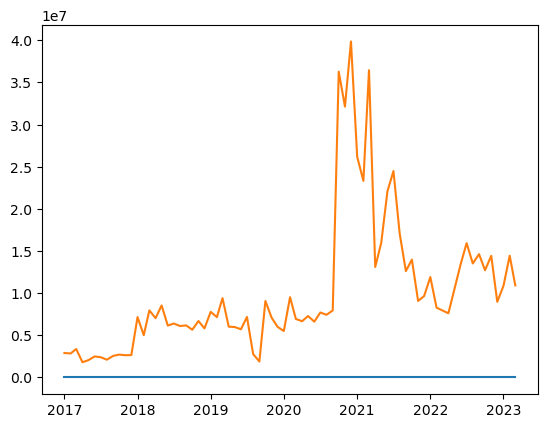

In [203]:
plat_vol = pd.read_csv("searching_job_visit.csv")
plat_vol.head()
plat_vol.columns = ["Month", "jobkorea", "saramin", "jobplanet"]

plat_vol['total'] = plat_vol["jobkorea"] + plat_vol["saramin"]

plat_vol['lntotal'] = np.log(plat_vol['total'])

plat_vol['Month'] = pd.to_datetime(plat_vol['Month'])

plt.plot(plat_vol['Month'], plat_vol["lntotal"])
plt.plot(plat_vol['Month'], plat_vol["total"])
plat_vol.head()


2. All Employment data

In [204]:
employment = pd.DataFrame(pd.read_csv("econ_pop.csv", encoding="euc-kr"))
employment = employment.iloc[1:, ]
employment.columns = ["Month","Econ_pop", "Employ_pop", "Unemploy_pop", "Unem_rate", "Em_rate"]
employment['Month'] = pd.to_datetime(employment['Month'].str.replace(".","-"))
employment.iloc[:,1:] = employment.iloc[:,1:].astype('float')
employment.head()

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_8692\3131611987.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  employment['Month'] = pd.to_datetime(employment['Month'].str.replace(".","-"))


,Month,Econ_pop,Employ_pop,Unemploy_pop,Unem_rate,Em_rate
1,2014-01-01,25941.0,25050.0,891.0,3.4,58.8
2,2014-02-01,26292.0,25116.0,1176.0,4.5,58.9
3,2014-03-01,26488.0,25463.0,1026.0,3.9,59.7
4,2014-04-01,27018.0,25985.0,1033.0,3.8,60.9
5,2014-05-01,27066.0,26112.0,955.0,3.5,61.1


3. 구직기반별 실업자

,Month,~3Month,3~6Month,6~12Month,12~18Month,18Month~
0,2016-09-01,512,304,153,166,13
1,2016-10-01,498,296,112,127,14
2,2016-11-01,438,266,136,147,11
3,2016-12-01,444,268,136,152,16
4,2017-01-01,615,275,104,118,14


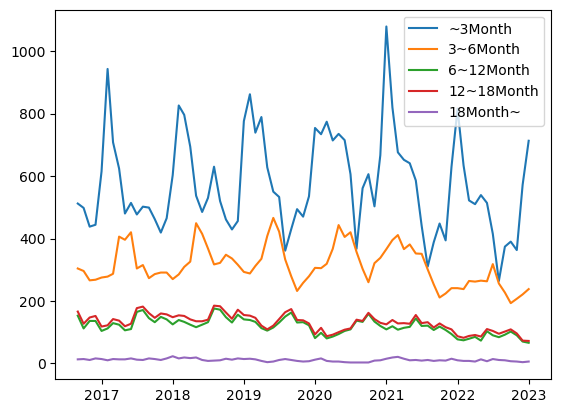

In [205]:
unem_data = pd.read_csv("unem_term.csv")
unem_data['Month'] = pd.to_datetime(unem_data['Month'])
plt.plot(unem_data['Month'],unem_data.iloc[:,1:])
plt.legend(['~3Month', '3~6Month', '6~12Month', '12~18Month', '18Month~'])
unem_data.head()

4. Empty Job

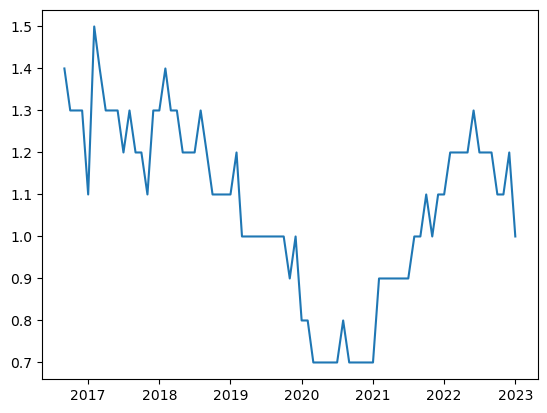

In [206]:
empty_job = pd.DataFrame(pd.read_csv("emptyjob.csv"))
empty_job["Emptyjob"] = empty_job["Emptyjob"].str.replace("-",".").astype("float32")
empty_job["Month"] = pd.to_datetime(empty_job["Month"])
plt.plot(empty_job["Month"],empty_job["Emptyjob"])

5. Unemployment per age data

C:\Users\Popperkim\AppData\Local\Temp\ipykernel_8692\2000986014.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  unem_age['시점'] = pd.to_datetime(unem_age['시점'].str.replace(".", "-"))


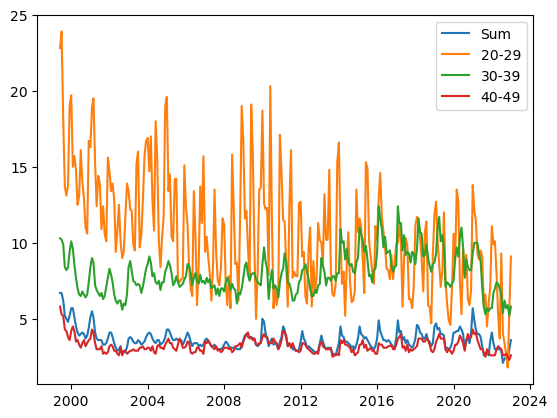

In [207]:
unem_age = pd.read_csv("Unemployment_age.csv", encoding="euc-kr")
unem_age = unem_age.iloc[1:,]
unem_age.iloc[:,1:] = unem_age.iloc[:,1:].astype('float')

unem_age['시점'] = pd.to_datetime(unem_age['시점'].str.replace(".", "-"))

unem_age.columns = ['Month', 'Sum', '15-19', '20-29', '30-39', '40-49', '50-59','60~', '15-64', '15-24', '15-29']

unem_age.head()

plt.plot(unem_age["Month"],unem_age.iloc[:,1:5])
plt.legend(['Sum', '20-29', '30-39', '40-49', '50-59','60~'])

In [208]:
x = pd.merge(plat_vol, employment, on = "Month")
y = pd.merge(x, unem_data, on = "Month")
alldata = pd.merge(y, unem_age, on = "Month")
alldata.columns

Index(['Month', 'jobkorea', 'saramin', 'jobplanet', 'total', 'lntotal',
       'Econ_pop', 'Employ_pop', 'Unemploy_pop', 'Unem_rate', 'Em_rate',
       '~3Month', '3~6Month', '6~12Month', '12~18Month', '18Month~', 'Sum',
       '15-19', '20-29', '30-39', '40-49', '50-59', '60~', '15-64', '15-24',
       '15-29'],
      dtype='object')

In [209]:
production_index = pd.DataFrame(pd.read_csv("total_production_index.csv"))

In [210]:
production_index.columns = ['Month',"total_production_index"]

In [211]:
alldata['production_index'] = production_index['total_production_index']

In [212]:
alldata['total_finder'] = alldata[['~3Month', '3~6Month', '6~12Month', '12~18Month', '18Month~']].sum(axis=1)
alldata['fine_finder'] = alldata[['~3Month', '3~6Month', '6~12Month']].sum(axis=1)

In [213]:
alldata['efficiency'] = alldata['fine_finder']/alldata['total_finder']

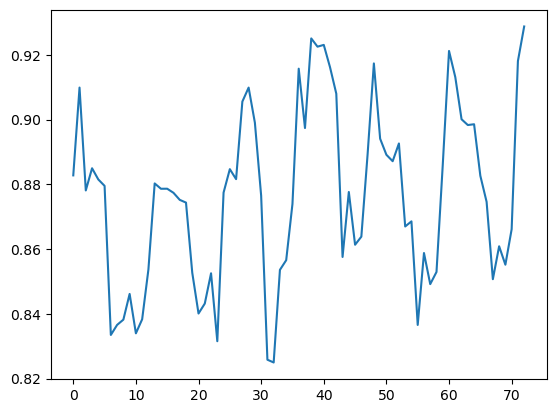

In [214]:
plt.plot(alldata.index, alldata['efficiency'])

1. Seanonal property

Text(0, 0.5, 'Unemployment Rate')

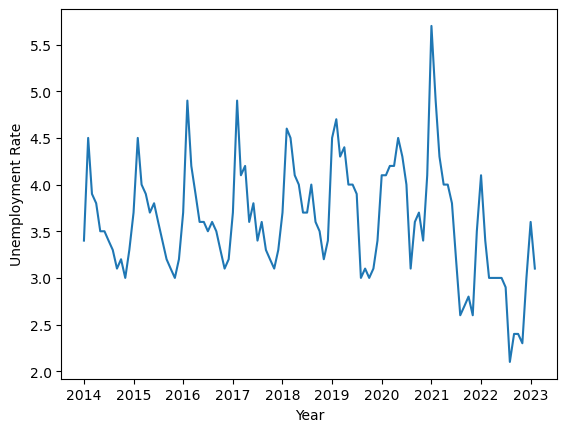

In [215]:
plt.plot(employment["Month"], employment["Unem_rate"])
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")

In [216]:
alldata.set_index("Month", inplace=True)

In [217]:
from statsmodels.tsa.seasonal import seasonal_decompose
unem_nsea = seasonal_decompose(alldata['Unem_rate'], model='additive', extrapolate_trend='freq')

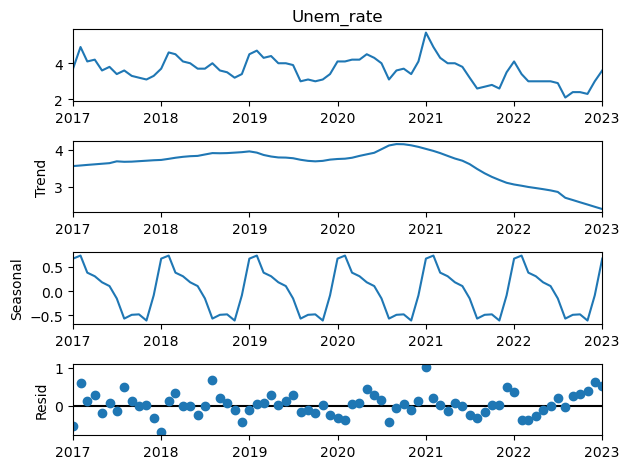

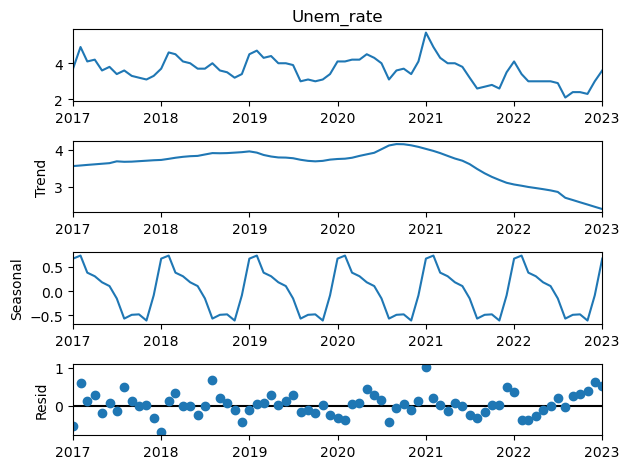

In [218]:
unem_nsea.plot()

In [219]:
alldata['unem_nsea'] = unem_nsea.trend

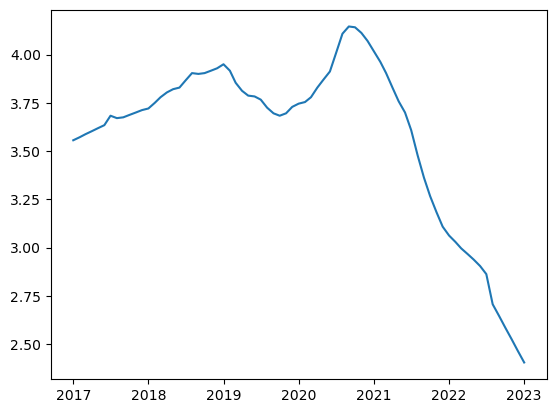

In [220]:
plt.plot(alldata.index, alldata['unem_nsea'])

In [221]:
effi_nonsea = seasonal_decompose(alldata['efficiency'], model='additive', extrapolate_trend='freq')

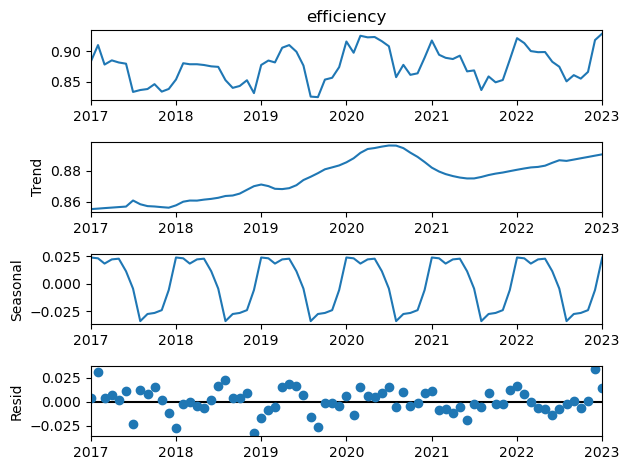

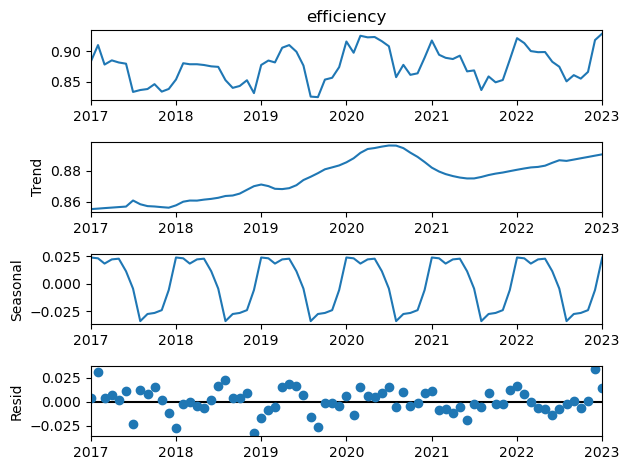

In [222]:
effi_nonsea.plot()

In [223]:
alldata['effi_nonsea'] = effi_nonsea.trend

In [224]:
Employment_nonsea = seasonal_decompose(alldata['Em_rate'], model='additive', extrapolate_trend='freq')

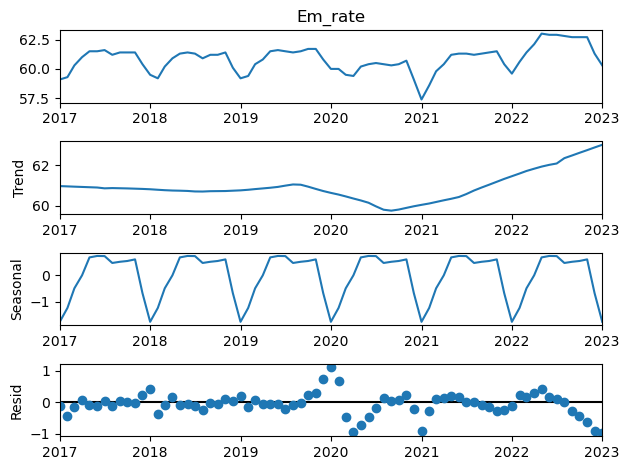

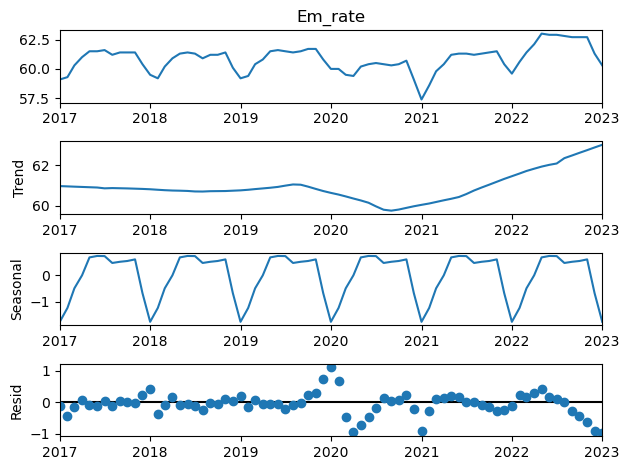

In [225]:
Employment_nonsea.plot()

Text(0, 0.5, 'log(total)')

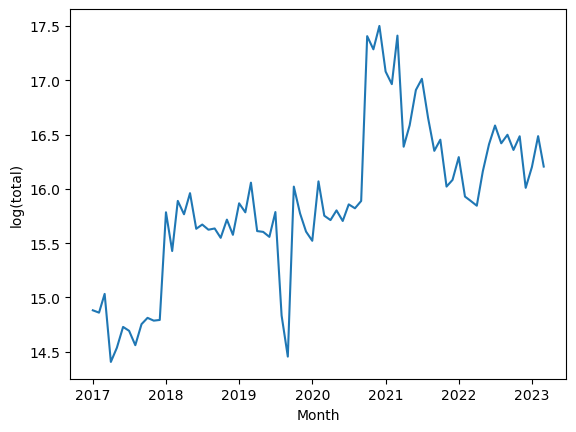

In [226]:
plt.plot(plat_vol["Month"], plat_vol["lntotal"])
plt.xlabel("Month")
plt.ylabel("log(total)")

In [227]:
alldata.columns

Index(['jobkorea', 'saramin', 'jobplanet', 'total', 'lntotal', 'Econ_pop',
       'Employ_pop', 'Unemploy_pop', 'Unem_rate', 'Em_rate', '~3Month',
       '3~6Month', '6~12Month', '12~18Month', '18Month~', 'Sum', '15-19',
       '20-29', '30-39', '40-49', '50-59', '60~', '15-64', '15-24', '15-29',
       'production_index', 'total_finder', 'fine_finder', 'efficiency',
       'unem_nsea', 'effi_nonsea'],
      dtype='object')

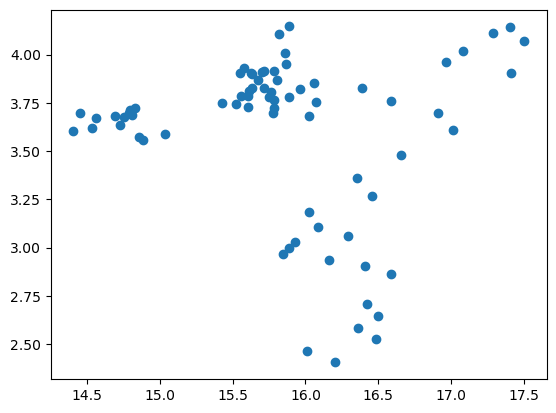

In [228]:
plt.scatter(alldata['lntotal'], alldata['unem_nsea'])

In [229]:
alldata.columns = ['jobkorea', 'saramin', 'jobplanet', 'Traffic_total', 'ln_Traffic_total',
       'Econ_pop', 'Employ_pop', 'Unemploy_pop', 'Unem_rate', 'Em_rate',
       '~3Month', '3~6Month', '6~12Month', '12~18Month', '18Month~', 'Sum',
       '15-19', '20-29', '30-39', '40-49', '50-59', '60~', '15-64', '15-24',
       '15-29','unemployment_', 'total_finder', 'fine_finder','efficiency', 'efficiency_', 'total_production_index']

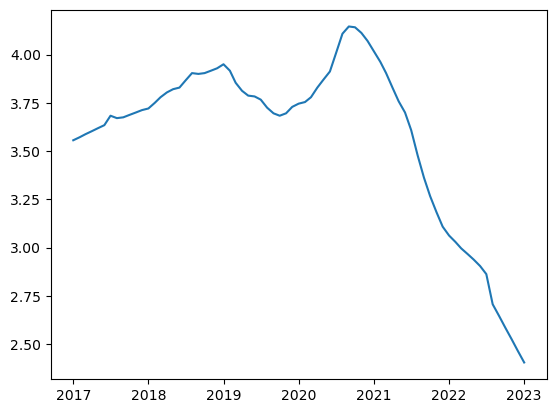

In [230]:
plt.plot(alldata.index, alldata['efficiency_'])

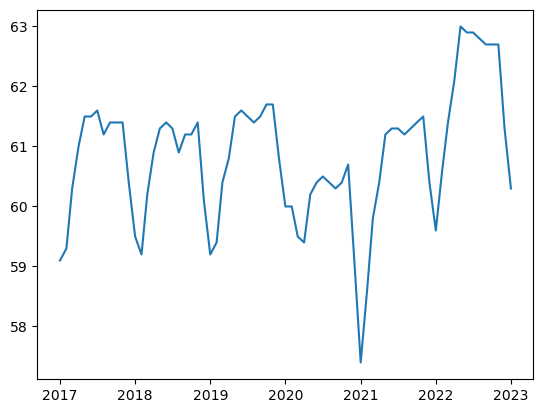

In [231]:
plt.plot(alldata.index, alldata['Em_rate'])

In [232]:
Empolyment_ = seasonal_decompose(alldata['Em_rate'], model='additive', extrapolate_trend='freq')

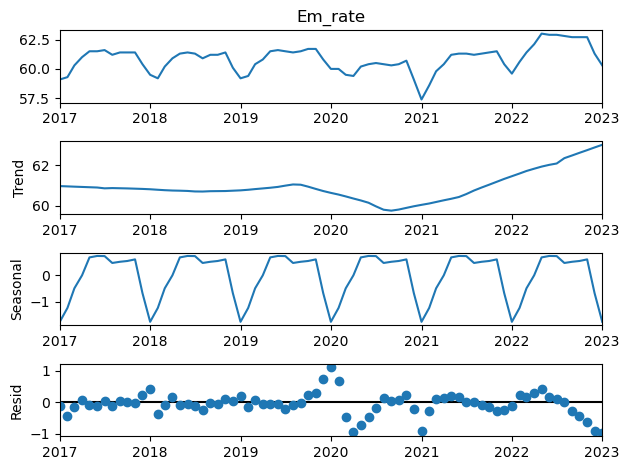

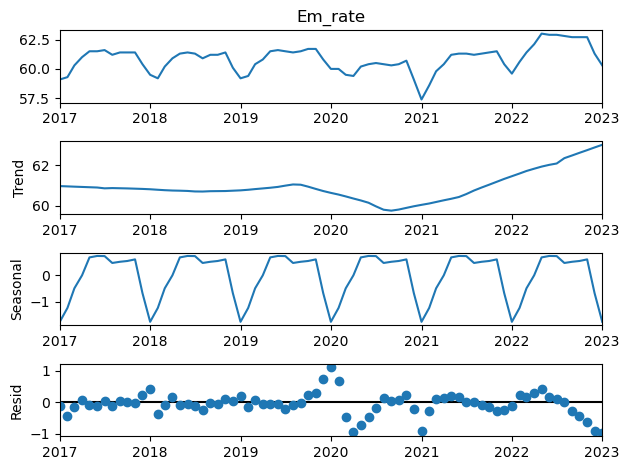

In [233]:
Empolyment_.plot()

In [234]:
alldata["Empolyment_"] = Empolyment_.trend

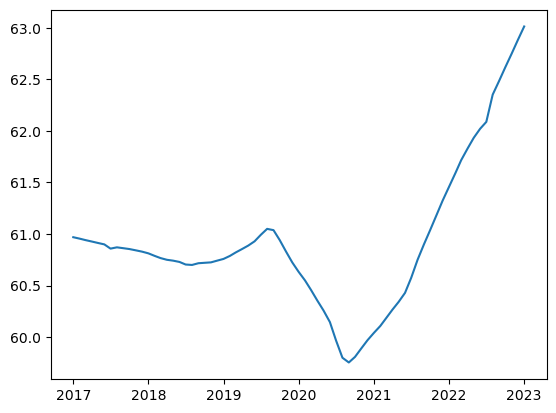

In [235]:
plt.plot(alldata.index, alldata["Empolyment_"])

array([[<AxesSubplot:xlabel='ln_Traffic_total', ylabel='ln_Traffic_total'>,
        <AxesSubplot:xlabel='Empolyment_', ylabel='ln_Traffic_total'>,
        <AxesSubplot:xlabel='efficiency_', ylabel='ln_Traffic_total'>],
       [<AxesSubplot:xlabel='ln_Traffic_total', ylabel='Empolyment_'>,
        <AxesSubplot:xlabel='Empolyment_', ylabel='Empolyment_'>,
        <AxesSubplot:xlabel='efficiency_', ylabel='Empolyment_'>],
       [<AxesSubplot:xlabel='ln_Traffic_total', ylabel='efficiency_'>,
        <AxesSubplot:xlabel='Empolyment_', ylabel='efficiency_'>,
        <AxesSubplot:xlabel='efficiency_', ylabel='efficiency_'>]],
      dtype=object)

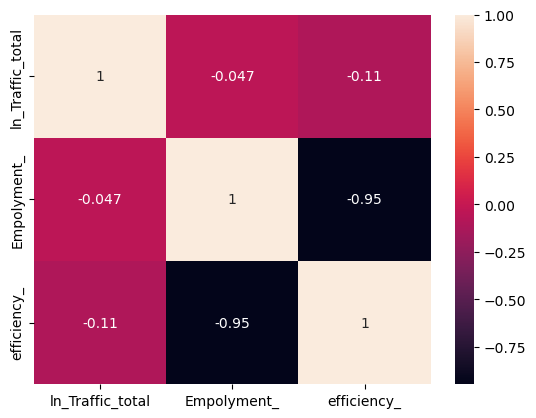

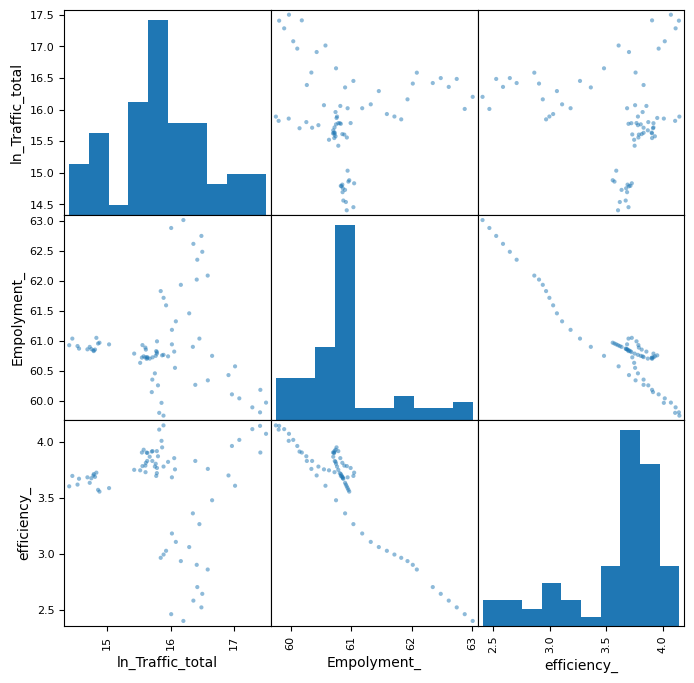

In [236]:
import seaborn as sns
from pandas.plotting import scatter_matrix

sns.heatmap(alldata[['ln_Traffic_total','Empolyment_', 'efficiency_']].corr(), annot=True)
scatter_matrix(alldata[['ln_Traffic_total','Empolyment_', 'efficiency_']],figsize=(8,8))

In [239]:
print(len(alldata))
print(alldata.columns)

73
Index(['jobkorea', 'saramin', 'jobplanet', 'Traffic_total', 'ln_Traffic_total',
       'Econ_pop', 'Employ_pop', 'Unemploy_pop', 'Unem_rate', 'Em_rate',
       '~3Month', '3~6Month', '6~12Month', '12~18Month', '18Month~', 'Sum',
       '15-19', '20-29', '30-39', '40-49', '50-59', '60~', '15-64', '15-24',
       '15-29', 'unemployment_', 'total_finder', 'fine_finder', 'efficiency',
       'efficiency_', 'total_production_index', 'Empolyment_'],
      dtype='object')


In [240]:
alldata.index[50]

Timestamp('2021-03-01 00:00:00')

In [241]:
print(np.corrcoef(alldata['Empolyment_'][0:50], alldata['efficiency_'][0:50])[0,1])
print(np.corrcoef(alldata['Empolyment_'][50:73], alldata['efficiency_'][50:73])[0,1])

-0.8393087841851116
-0.9913666316361697


In [242]:
time_va = [0] * 50 + [1] * 23
alldata['after202103'] = time_va

- 전산업생산지수를 통제변수로 놓고 분석 (계절조정)

array([[<AxesSubplot:xlabel='ln_Traffic_total', ylabel='ln_Traffic_total'>,
        <AxesSubplot:xlabel='total_production_index', ylabel='ln_Traffic_total'>,
        <AxesSubplot:xlabel='efficiency_', ylabel='ln_Traffic_total'>],
       [<AxesSubplot:xlabel='ln_Traffic_total', ylabel='total_production_index'>,
        <AxesSubplot:xlabel='total_production_index', ylabel='total_production_index'>,
        <AxesSubplot:xlabel='efficiency_', ylabel='total_production_index'>],
       [<AxesSubplot:xlabel='ln_Traffic_total', ylabel='efficiency_'>,
        <AxesSubplot:xlabel='total_production_index', ylabel='efficiency_'>,
        <AxesSubplot:xlabel='efficiency_', ylabel='efficiency_'>]],
      dtype=object)

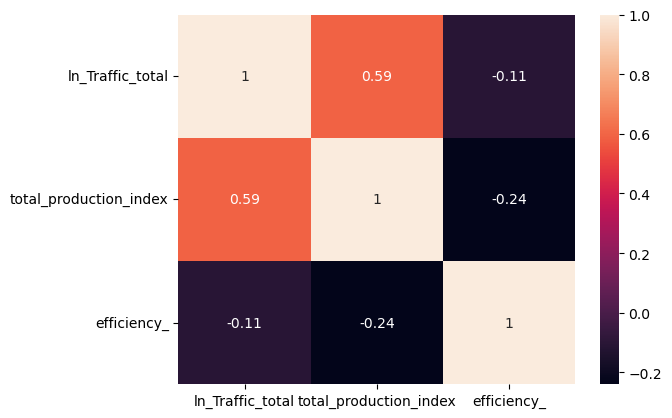

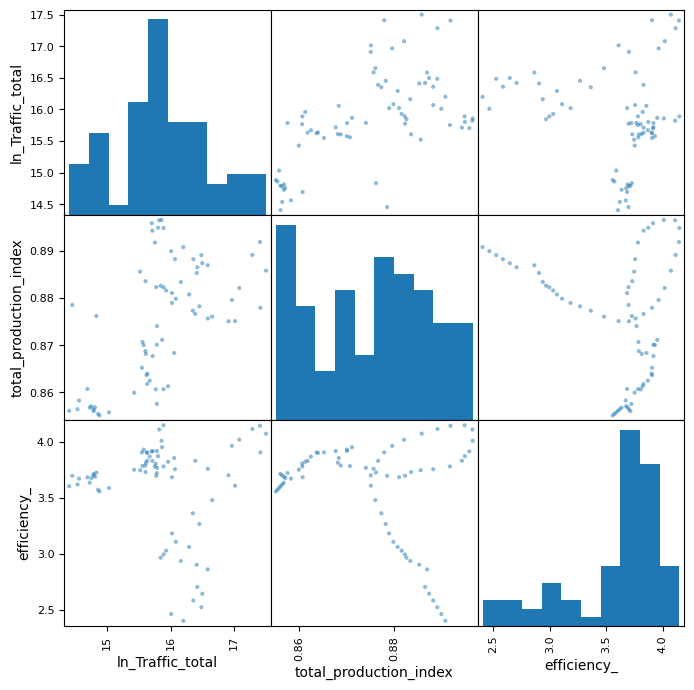

In [247]:
sns.heatmap(alldata[['ln_Traffic_total','total_production_index', 'efficiency_']].corr(), annot=True)
scatter_matrix(alldata[['ln_Traffic_total','total_production_index', 'efficiency_']],figsize=(8,8))

3. 회귀분석 진행

In [243]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [244]:
analysis1 = smf.ols(formula= "efficiency_ ~ Empolyment_*after202103 + ln_Traffic_total",data=alldata).fit(cov_type='HC3')
print(analysis1.summary())

                            OLS Regression Results                            
Dep. Variable:            efficiency_   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     1634.
Date:                Mon, 29 May 2023   Prob (F-statistic):           9.42e-67
Time:                        14:35:39   Log-Likelihood:                 95.512
No. Observations:                  73   AIC:                            -181.0
Df Residuals:                      68   BIC:                            -169.6
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [245]:
from statsmodels.stats.sandwich_covariance import cov_hac

In [246]:
analysis2 = smf.ols(formula= "efficiency_ ~ Empolyment_*after202103 + ln_Traffic_total",data=alldata).fit(cov_type='HAC', cov_kwds={'maxlags': 2, 'use_correction': True})
print(analysis2.summary())

                            OLS Regression Results                            
Dep. Variable:            efficiency_   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     951.9
Date:                Mon, 29 May 2023   Prob (F-statistic):           6.90e-59
Time:                        14:35:39   Log-Likelihood:                 95.512
No. Observations:                  73   AIC:                            -181.0
Df Residuals:                      68   BIC:                            -169.6
Df Model:                           4                                         
Covariance Type:                  HAC                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

- 전산업생산지수 통제변수

In [249]:
analysis3 = smf.ols(formula= "efficiency_ ~ total_production_index + ln_Traffic_total",data=alldata).fit(cov_type='HC3')
print(analysis3.summary())

                            OLS Regression Results                            
Dep. Variable:            efficiency_   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     1.682
Date:                Mon, 29 May 2023   Prob (F-statistic):              0.193
Time:                        14:38:42   Log-Likelihood:                -40.126
No. Observations:                  73   AIC:                             86.25
Df Residuals:                      70   BIC:                             93.12
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11

In [251]:
analysis4 = smf.ols(formula= "efficiency_ ~ total_production_index + ln_Traffic_total",data=alldata).fit(cov_type='HAC', cov_kwds={'maxlags': 2, 'use_correction': True})
print(analysis4.summary())

                            OLS Regression Results                            
Dep. Variable:            efficiency_   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                    0.6474
Date:                Mon, 29 May 2023   Prob (F-statistic):              0.527
Time:                        14:39:25   Log-Likelihood:                -40.126
No. Observations:                  73   AIC:                             86.25
Df Residuals:                      70   BIC:                             93.12
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 11

- 산업생산 지수보다 노동시장과 더 연관성이 크면서 경기 사이클을 보여주는 고용률 변수가 통제변수로 더 적합함을 확인